# EDA of  Prosper Loan Dataset
## by Maha Haj Meftah

## Introduction

> This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

 ###  Main features of interest in your dataset

> loanStatus,CreditGrade

###  Features that may help support your investigation into  features of interest

>  LoanOriginalAmount,EmploymentStatus,BorrowerRate,LenderYield,MonthlyLoanPayment








## Preliminary Wrangling


In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
#For googleColab
#from google.colab import drive
#drive.mount('/content/drive')
#%cd drive/MyDrive

Mounted at /content/drive
/content/drive/MyDrive


> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [4]:
# Loading Data
loan_data= pd.read_csv('prosperLoanData.csv')

In [5]:
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [72]:
loan_data.shape

(113937, 81)

# Data Assessing 

**Assigning correct data type**

In [6]:
# Changing to Datetime datatype

dates = ['ListingCreationDate', 'ClosedDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanOriginationDate']
for i in dates: 
    loan_data[i] = pd.to_datetime(loan_data[i], format='%Y-%m-%d %H:%M:%S.%f')

**Filling Empty values with NULL**

In [7]:
for i in loan_data.columns:
    loan_data[i] = loan_data[i].replace('', np.nan)
    

### columns not required

In [8]:
not_required_columns = ['ListingKey', 'ListingNumber', 'ListingCreationDate', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey', 'LoanNumber', 'LoanOriginationDate', 'MemberKey', ]
loan_data.drop(labels = not_required_columns, axis =1, inplace=True)
loan_data.reset_index(drop=True, inplace=True)

print("So now we are left with",loan_data.shape ,"rows & columns.")

So now we are left with (113937, 72) rows & columns.


**Checking LoanStatus Column and Removing Categories contributing less than 1.5% to the data**

In [11]:
(loan_data.LoanStatus.value_counts()*100)/len(loan_data)

Current                   49.917929
Completed                 33.273324
Chargedoff                10.419535
Defaulted                  4.383317
Past Due (1-15 days)       0.709520
Past Due (31-60 days)      0.320343
Past Due (61-90 days)      0.275336
Past Due (91-120 days)     0.268276
Past Due (16-30 days)      0.233859
FinalPaymentInProgress     0.180910
Past Due (>120 days)       0.013237
Cancelled                  0.004412
Name: LoanStatus, dtype: float64

In [12]:
del_LoanStatus = (loan_data.LoanStatus.value_counts()*100)/len(loan_data)
del_LoanStatus = del_LoanStatus[(del_LoanStatus < 1.5)]

loan_data.drop(labels = loan_data[loan_data.LoanStatus.isin(del_LoanStatus.index)].index, inplace=True)
loan_data.reset_index(drop=True, inplace=True)

print("So now we are left with",loan_data.shape ,"rows & columns.")

print(loan_data.LoanStatus.unique())

So now we are left with (111043, 72) rows & columns.
['Completed' 'Current' 'Defaulted' 'Chargedoff']


**Checking EmploymentStatus Column and Removing Categories 
contributing less than 1.5% to the data**

In [13]:
print(loan_data.EmploymentStatus.unique())
(loan_data.EmploymentStatus.value_counts()*100)/len(loan_data)

['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan
 'Not employed' 'Part-time' 'Retired']


Employed         58.905109
Full-time        23.399044
Self-employed     5.183578
Not available     4.814351
Other             3.314032
Part-time         0.932972
Not employed      0.718641
Retired           0.704232
Name: EmploymentStatus, dtype: float64

In [14]:
del_EmploymentStatus = (loan_data.EmploymentStatus.value_counts()*100)/len(loan_data)
del_EmploymentStatus = del_EmploymentStatus[(del_EmploymentStatus < 1.5)]

loan_data.drop(labels = loan_data[loan_data.EmploymentStatus.isin(del_EmploymentStatus.index)].index, inplace=True)
loan_data.reset_index(drop=True, inplace=True)

print("So now we are left with",loan_data.shape ,"rows & columns.")

print(loan_data.EmploymentStatus.unique())

So now we are left with (108427, 72) rows & columns.
['Self-employed' 'Employed' 'Not available' 'Full-time' 'Other' nan]


In [15]:
# # dict = {"$1-24,999" : 12500, "$25,000-49,999" : 37500, "$50,000-74,999": 62500, "$75,000-99,999" : 87500, "$100,000+": 112500}
# # loan_data.replace({"IncomeRange": dict}, inplace=True)

# bins = [1, 25000, 50000, 75000, 100000,125000]
# slot = ['1-24999', '25000-49999', '50000-74999', '75000-99999', '100000 and above']
# loan_data['IncomeRangeNew'] = pd.cut(loan_data['IncomeRange'], bins, labels=slot)

## Univariate Exploration


**Univariate Analysis**

In [15]:
def univariate(df,col,vartype,hue =None):
    
    '''
    Univariate function will plot the graphs based on the parameters.
    df      : dataframe name
    col     : Column name
    vartype : variable type : continuos or categorical
                Continuos(0)   : Distribution, Violin & Boxplot will be plotted.
                Categorical(1) : Countplot will be plotted.
    hue     : It's only applicable for categorical analysis.
    
    '''
    sns.set(style="darkgrid")
    
    if vartype == 0:
        fig, ax=plt.subplots(nrows =1,ncols=2,figsize=(20,8))
        ax[0].set_title("Distribution Plot")
        sns.distplot(df[col],ax=ax[0])
        ax[1].set_title("Box Plot")
        sns.boxplot(data =df, x=col,ax=ax[1],orient='v')
    
    if vartype == 1:
        temp = pd.Series(data = hue)
        fig, ax = plt.subplots()
        width = len(df[col].unique()) + 6 + 4*len(temp.unique())
        fig.set_size_inches(width , 7)
        ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue) 
        if len(temp.unique()) > 0:
            for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(loan_data))), (p.get_x()+0.05, p.get_height()+20))  
        else:
            for p in ax.patches:
                ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+20)) 
        del temp
    else:
        exit
        
    plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


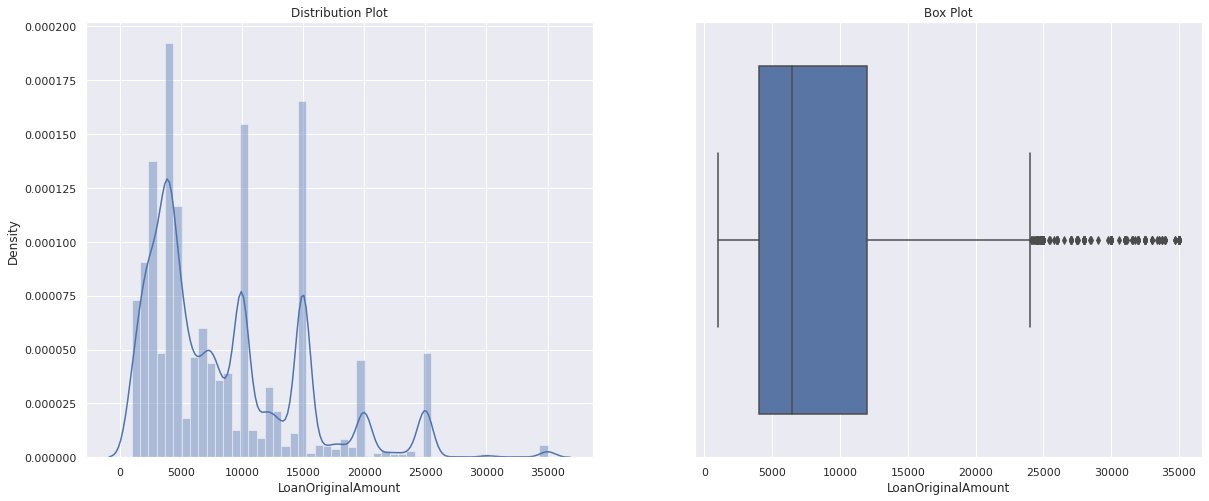

In [17]:
univariate(df=loan_data,col='LoanOriginalAmount',vartype=0)

- #### loans are between 5000 and 25000 with vast majorty less than 5000
- #### some oultiers are higher than 25000

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


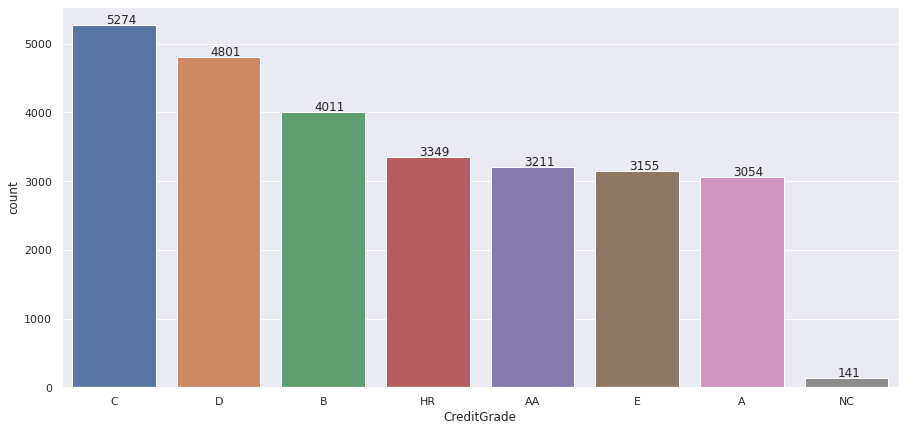

In [36]:
univariate(df=loan_data,col='CreditGrade',vartype=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


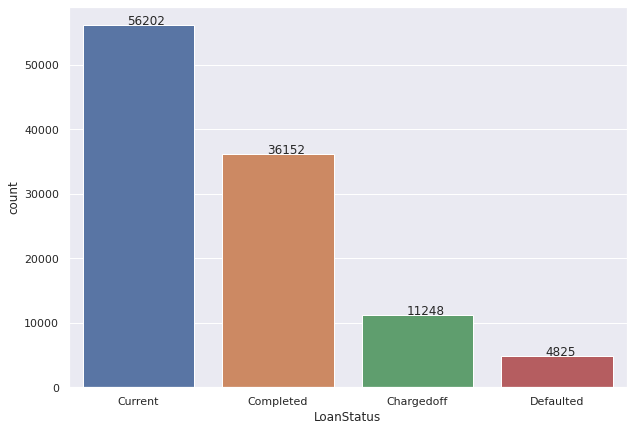

In [37]:
univariate(df=loan_data,col='LoanStatus',vartype=1)

- ### The most of the loans are current . 
- ### The most of clients pay back their  loans , we have a small percentage of people who don't .

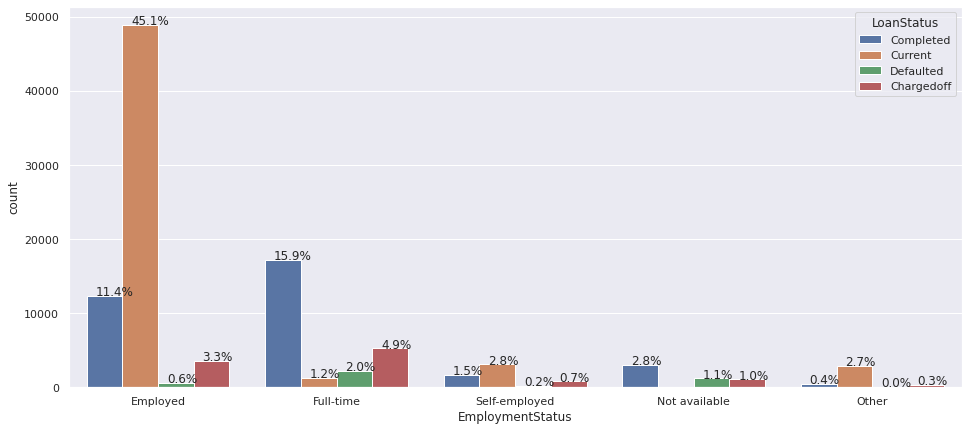

In [20]:
univariate(df=loan_data, col='EmploymentStatus',vartype=1,hue='LoanStatus')

- #### Employed people with full-time jobs are the biggest cateroy of the clients and they are the most who complete their loans

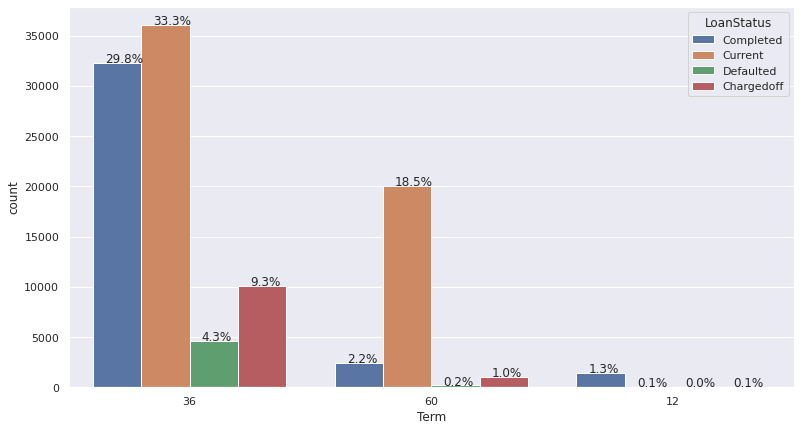

In [21]:
univariate(df=loan_data,col='Term',vartype=1,hue='LoanStatus')

 - #### 3 years is the most frequent period to pay back loans.
 - #### Loans with longer term have a bigger proportion of completness than those that have short term


<font color='red'>Research Question 1 : What are the most number of borrowers Credit
Grade?</font>

Unique grade values are:  ['C' nan 'HR' 'AA' 'D' 'B' 'E' 'A' 'NC']
Most occuring Credit Grade is:  0    C
dtype: object
Frequency of Credit Grades: 
 C     5274
D     4801
B     4011
HR    3349
AA    3211
E     3155
A     3054
NC     141
Name: CreditGrade, dtype: int64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.


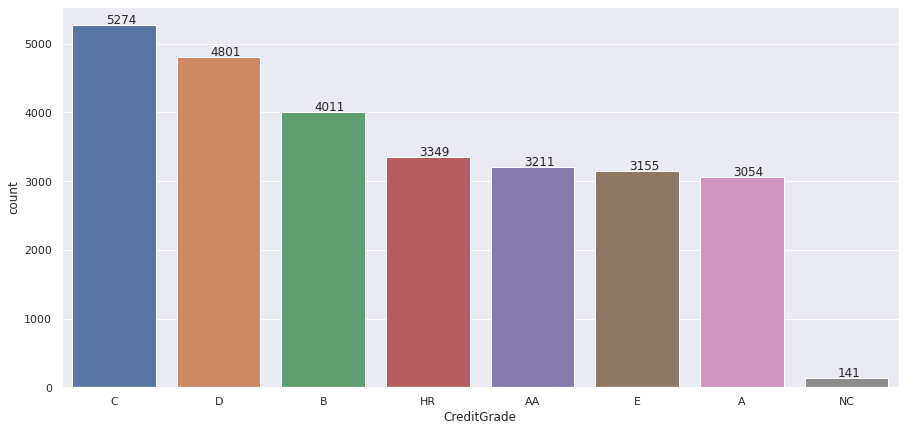

In [22]:
# Check the univariate relationship of Credit Grade
print("Unique grade values are: ", loan_data.CreditGrade.unique())
print("Most occuring Credit Grade is: ", loan_data['CreditGrade'].mode())
print("Frequency of Credit Grades: \n", loan_data['CreditGrade'].value_counts())

univariate(df=loan_data,col='CreditGrade',vartype=1)

**The most present  grade is C ,B and D wich means an avreage grade .**


**Research** Question 2 : **What is the highest number of BorrowerRate?** 


Most occuring BorrowerRate is:  0    0.3177
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


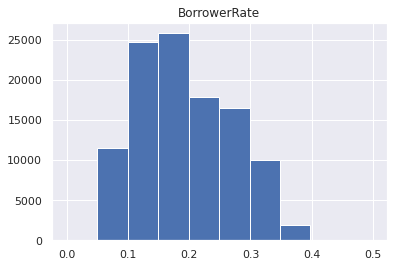

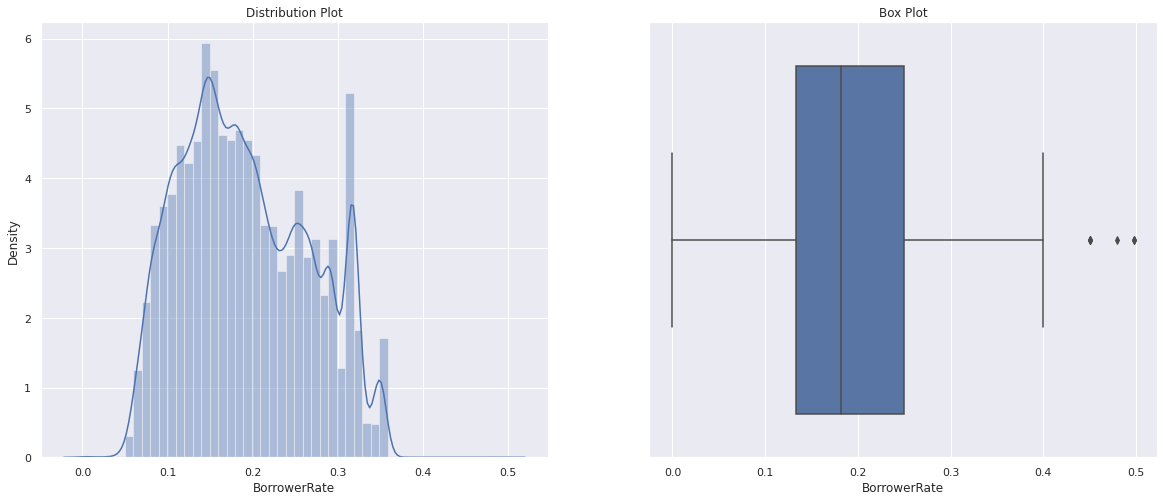

In [23]:
# Check the univariate relationship of Borrower rate

print("Most occuring BorrowerRate is: ", loan_data['BorrowerRate'].mode())
loan_data.hist(column='BorrowerRate')

univariate(df=loan_data,col='BorrowerRate',vartype=0)

- #### The  highest number of Borrower Rate is between 0.1 and 0.2

## Bivariate Exploration

> In this section, I investigate relationships between pairs of variables in 
data

**Research** Question 5: **Here we look at the Completed Loan Status
and Defaulted Rate to determine the accuracy of Credit Grade.**

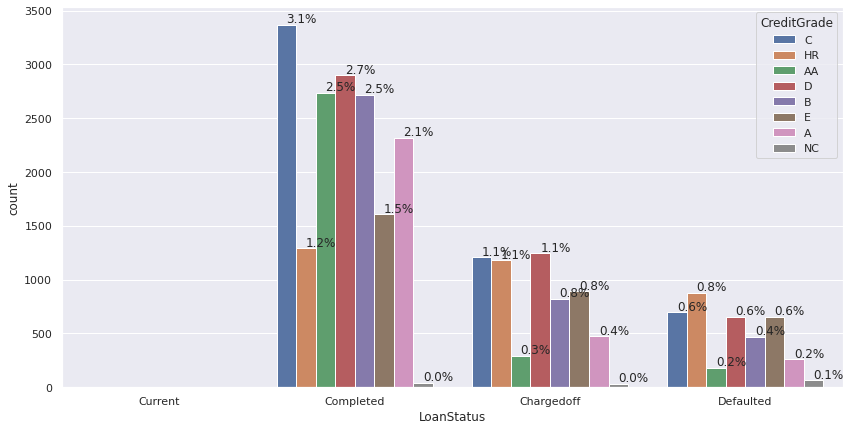

In [24]:
univariate(df=loan_data,col='LoanStatus',vartype=1,hue='CreditGrade')

**Now we know the Credit Grade is accurate
and is a tool that is used by the organization in determining the
person’s creditworthiness.**

**Research** Question 4 : **Is the Credit Grade really accurate? Does
higher Credit Grade leads to higher Monthly Loan Payment? As for
Higher Credit Grade we mean from Grade AA to B** 

Mean of Montly Loan Payment with AA Grade:  301.0917471192775
Mean of Montly Loan Payment with A Grade:  318.4789390962672
Mean of Montly Loan Payment with B Grade:  295.4594589877836
Mean of Montly Loan Payment with C Grade:  221.1171274175199
Mean of Montly Loan Payment with D Grade:  179.20088731514267
Mean of Montly Loan Payment with E Grade:  130.44089064976228
Mean of Montly Loan Payment with HR Grade:  93.6763362197671
Mean of Montly Loan Payment with NC Grade:  86.73007092198583


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 91.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 90.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 92.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 94.7% of the points cannot be placed; y

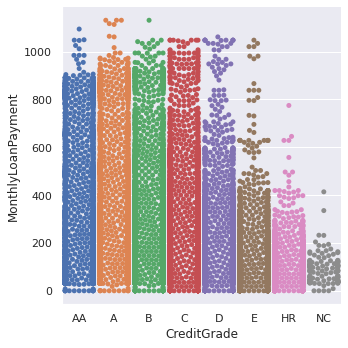

In [25]:
# Check the Bivariate Relationship between CreditGarde and MonthlyLoan Payment

df_CG_MLP = pd.concat([loan_data.loc[loan_data['CreditGrade'] == "AA" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "A" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "B" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "C" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "D" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "E" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "HR" , ['CreditGrade', 'MonthlyLoanPayment']], loan_data.loc[loan_data['CreditGrade'] == "NC" , ['CreditGrade', 'MonthlyLoanPayment']]])
# print(df_CG_MLP)

for i in ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC']:
    print("Mean of Montly Loan Payment with", i, "Grade: ", (loan_data.loc[loan_data['CreditGrade'] == i , ['CreditGrade', 'MonthlyLoanPayment']])['MonthlyLoanPayment'].mean())


# df_CG_MLP.plot(x='CreditGrade', y='MonthlyLoanPayment', style='o')
sns.catplot(x="CreditGrade", y="MonthlyLoanPayment", kind="swarm", data=df_CG_MLP)

- #### We conclude the the highest the grade ,the highest is the payement per month 

**Research** Question 3 : **Since the highest number of Borrower Rate
is between 0.1 and 0.2, does the highest number of Lender Yield is
between 0.1 and 0.2?** 

Most occuring LenderYield is:  0    0.3077
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))


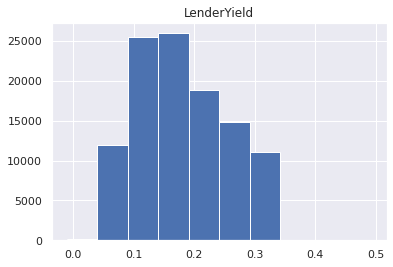

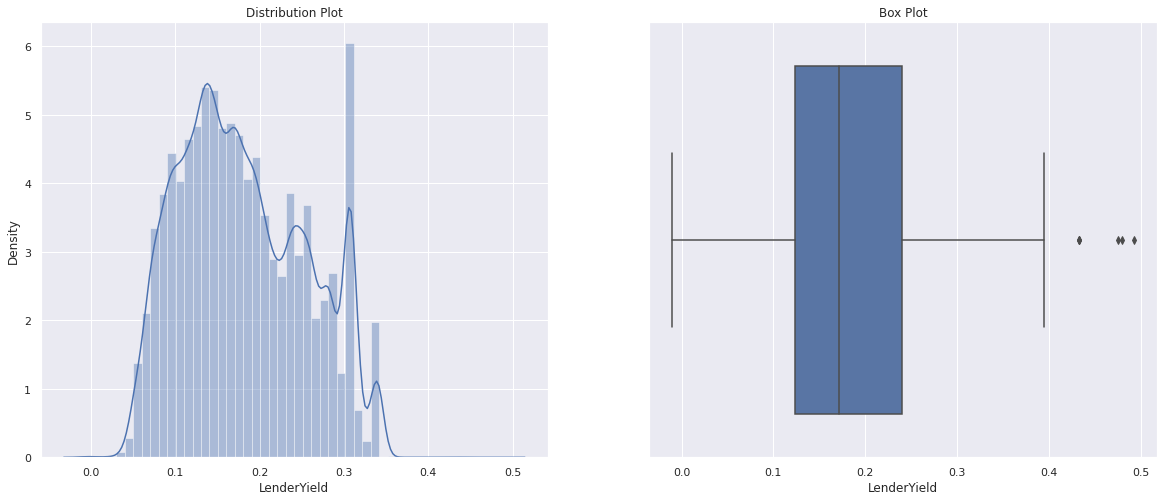

In [26]:
# Check the univariate relationship of Lender Yield on Loan

print("Most occuring LenderYield is: ", loan_data['LenderYield'].mode())
loan_data.hist(column='LenderYield')


univariate(df=loan_data,col='LenderYield',vartype=0)

- ### The lenderYield is also bettween 0.1 and 0.2

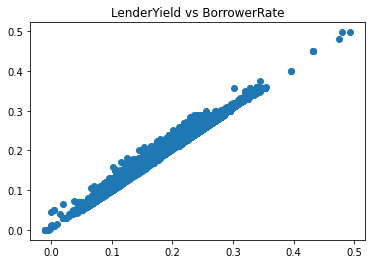

In [23]:
plt.scatter(loan_data.LenderYield,loan_data.BorrowerRate);
plt.title('LenderYield vs BorrowerRate');


- **Actually the LenderYield and the BorrowerRate are highly correlated**

###  relationships you observed in this part of the investigation. 
> Now we know the Credit Grade is accurate and is a tool that is used by the organization in determining the person’s creditworthiness.
> We conclude the the highest the grade is the highest is the payement per month

## Multivariate Exploration

> 

In [28]:
loan_data.corr()

,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
Term,1.000000,-0.011057,0.020704,0.021173,0.060093,-0.101148,0.152516,0.072455,0.026295,0.004530,...,-0.164352,0.038630,-0.037335,-0.034863,-0.034397,-0.028350,-0.058906,-0.046148,-0.023824,-0.048652
BorrowerAPR,-0.011057,1.000000,0.989674,0.989161,0.897428,0.949842,0.796128,-0.962165,-0.668103,0.130059,...,0.118804,-0.037251,0.071727,0.071654,0.029657,-0.027476,-0.041028,-0.044919,-0.028528,-0.306928
BorrowerRate,0.020704,0.989674,1.000000,0.999199,0.897234,0.945667,0.819542,-0.953106,-0.649352,0.100256,...,0.097287,-0.049819,0.105047,0.104568,0.043243,-0.028404,-0.027125,-0.035074,-0.023481,-0.272947
LenderYield,0.021173,0.989161,0.999199,1.000000,0.897294,0.945677,0.819528,-0.953119,-0.649399,0.101684,...,0.099154,-0.049319,0.103853,0.103387,0.042163,-0.028586,-0.027947,-0.035440,-0.023812,-0.272949
EstimatedEffectiveYield,0.060093,0.897428,0.897234,0.897294,1.000000,0.801140,0.803463,-0.850666,-0.632255,0.109031,...,0.059515,-0.058300,0.144180,0.143418,0.049086,-0.042971,-0.045235,-0.062669,-0.037328,-0.265154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PercentFunded,-0.028350,-0.027476,-0.028404,-0.028586,-0.042971,-0.022350,-0.039870,0.012125,-0.019631,-0.010608,...,0.069553,0.004040,-0.014835,-0.015261,0.000316,1.000000,0.009528,0.001188,0.003028,-0.050458
Recommendations,-0.058906,-0.041028,-0.027125,-0.027947,-0.045235,0.004857,-0.018951,0.004116,0.026593,-0.029322,...,-0.043000,-0.018573,0.042555,0.041905,0.019240,0.009528,1.000000,0.661949,0.250339,0.080012
InvestmentFromFriendsCount,-0.046148,-0.044919,-0.035074,-0.035440,-0.062669,0.010102,-0.042139,0.007073,0.027721,-0.021347,...,-0.040801,-0.011776,0.021565,0.020770,0.012630,0.001188,0.661949,1.000000,0.429341,0.067123
InvestmentFromFriendsAmount,-0.023824,-0.028528,-0.023481,-0.023812,-0.037328,0.025020,-0.030609,-0.010718,0.003172,-0.013594,...,-0.053815,-0.012168,0.026756,0.026361,0.021242,0.003028,0.250339,0.429341,1.000000,0.011480


**Research** Question 6: **what is the relation bettwen Borrower rate, loanorginal amount and Credit Grade**

In [20]:
#e create a random sample of 10000 loans
np.random.seed(2022)
sample = np.random.choice(loan_data.shape[0],10000)
loan_data_subset = loan_data.loc[sample]




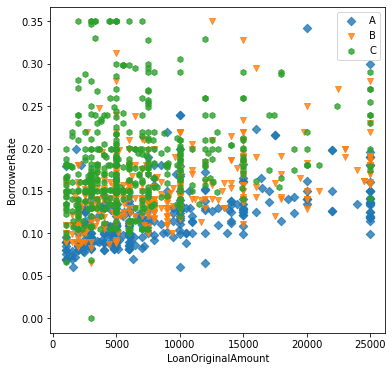

In [21]:
plt.figure(figsize=(6,6))

ttype_marker =[['A','D'],['B','v'],['C','h']]
for ttype,marker in ttype_marker:
  plot_data = loan_data_subset.loc[loan_data_subset['CreditGrade']==ttype]
  sns.regplot(data =plot_data,x='LoanOriginalAmount',y='BorrowerRate',marker=marker,fit_reg=False)
plt.legend(['A','B','C'])
plt.show()


**For a given amount the Borrower Rate of A are tend to be lowner than B and C**

**Research** Question 7: **How the Monthly Payment is derived from Interest Rate and  Original Amount of Loan**

In [113]:
#e create a random sample of 10000 loans
np.random.seed(2022)
sample1 = np.random.choice(loan_data.shape[0],200)
loan_data_subset1 = loan_data.loc[sample1]

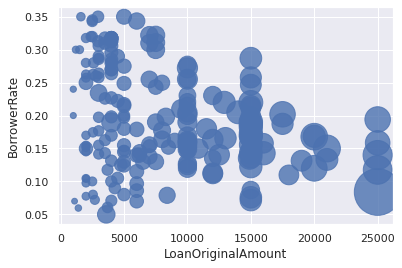

In [116]:
sns.regplot(data =loan_data_subset1,x='LoanOriginalAmount',y='BorrowerRate',
            scatter_kws={'s':loan_data_subset1['MonthlyLoanPayment']},fit_reg=False)

**The large point size  indicatelare monthly payment.**

**Monthly paymnet are large from an amount of 10000 and and a brrower rate higher than 0.10**

### Relationships observed in this part of the investigation. 

> In this section I studied the relation shape between the class of the loan and the interest rate and the orginal amount of loan. It make us uderstand that the organisation assign the grade A for low intereset rate independtly of the amount of money.  The other factor we studied is the monthly payment.The monthly payment is higher whene borrower rate and loan amout depass certain values.



## Conclusions
>**The half of the data is not usable because the half of loans are current.
EmploymentStatus doesn't help to idenitfy what kind of jobs helps to determin the completness of the loan since the most of label here employed, full-time, selfemployed.
Loans with longer term have a bigger proportion of completness than those that have short term.
The relationship between LenderYield and BorrowerRate is linear.The creditGrade is a good tool used to.The most commun interest(BorrowerRate) is between 0.1 and 0.2.
Completnees of loan and high monthly payment are associeted with high creditGrade.
High Credit Grade is associeted to low borrower rate independently from the amount of the loan.
The monthly payment is derivated from the interest and the amount of the loan.**